# Projeto 1 - Ciência dos Dados

 Eduardo Heitor Penteado

 Felipe Lemos

 Lourenco de Paula

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [52]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\felem\OneDrive\Documentos\2021.1\Ciencia dos Dados 2A\Projeto 1\P1-2021-Cdados-2A


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [53]:
filename = 'volkswagen.xlsx'

In [54]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,B1
0,estão vendo esse logo? é da volkswagen !\no ma...,0
1,autoeuropa de palmela não deverá ser afetada p...,2
2,se fizerem eu tatuo volkswagen no meu peito e ...,0
3,grupo volkswagen terá plataforma única para to...,3
4,@volkswagen apresenta roteiro da tecnologia p...,1


In [55]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,B1
0,@moremotorcycles made by volkswagen👍,0
1,"esperemos que seja verdade, que em portugal nã...",0
2,"a china ""permaneceu como o maior mercado único...",3
3,volkswagen investirá em 6 fábricas de baterias...,1
4,"inclusive, é bem provável que os agressores gr...",2


___
## Classificador automático de sentimento


Escolhemos a marca de automóveis **Volkswagen**, e assim montamos um classificador com as seguintes legendas **(0-irrelevante, 1-neutro, 2-relevante, 3-muito relevante)**. 

- Como **"0"**: definimos como irrelevante assuntos que apenas fazem uso do nome da marca porém não possuem contexto. 
#### **Exemplo : "comprei um carro para andar dentro de água era um volkswagen golfinho"**



- Como **"1"**: definimos como neutro assuntos relacionados a marca mas nao que expressam em si alguma qualidade, critica ou novidade.
#### **Exemplo: "volkswagen reconhece apoio à ditadura militar no brasil"**



- Como **"2"**: definimos como relevantes assuntos que expressam novidades e características sobre a marca, mesmo que não expresse uma opinão nítida de qualidade. 
#### **Exemplo: "volkswagen confirma polo track com motor 1.0"**



- Como **"3"**: Por ultimo, definimos como muito relevate, os tweets que alem de cumprir os requisitos de ser classificado como "2", expõe de maneira clara uma avaliação sobre a qualidade e competência da marca. 
#### **Exemplo: "melhor carro do mundo bjks — todo mundo adora volkswagen"**


**OBS:** Posteriormento no projeto, avaliamos que seria melhor juntar as categorias relevantes e muito relevantes, de forma a adptar o classificador e trabalhar com probabilidades melhores.

## Funções de Limpeza

In [56]:
import re 
import functools
import operator
import emoji

# Função de limpeza a qual troca alguns sinais básicos por espaços
def cleanup(text):
  
    punctuation = '[/!-.:?;"@]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

def cleanup_n(text):
    punctuation = '\n'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

#Limpeza Emoji e Split do texto
def cleanup_emoji(em):
    
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    
    return em_split



## Treinamento

In [57]:
irrelevantes = train['B1'] == 0
neutro = train['B1'] == 1
relevantes = train['B1'] == 2
mt_relevantes = train['B1'] == 3

dados_i = train.loc[irrelevantes,:] 
dados_n = train.loc[neutro,:]
dados_r = train.loc[relevantes,:]
dados_mtr = train.loc[mt_relevantes,:]

In [58]:
# ''.join() = to_string()

#string com irrelevantes
txt_irrelevantes = dados_i.Treinamento.to_string()
#aplica as funções de limpeza
clean_irrelevantes = cleanup_emoji(cleanup_n(cleanup(txt_irrelevantes.lower())))

#string com neutros 
txt_neutro = dados_n.Treinamento.to_string()
#aplica as funções de limpeza
clean_neutro = cleanup_emoji(cleanup_n(cleanup(txt_neutro.lower())))

#string com relevantes =
txt_relevantes = dados_r.Treinamento.to_string()
#aplica as funções de limpeza
clean_relevantes = cleanup_emoji(cleanup_n(cleanup(txt_irrelevantes.lower())))

#string com  muito relevantes
txt_mtrelevantes = dados_mtr.Treinamento.to_string()
#aplica as funções de limpeza
clean_mtrelevantes = cleanup_emoji(cleanup_n(cleanup(txt_mtrelevantes.lower())))


## Teste

In [59]:
test_irrelevantes = test['B1'] == 0
test_neutro = test['B1'] == 1
test_relevantes = test['B1'] == 2
test_mt_relevantes = test['B1'] == 3

Tdados_i = test.loc[test_irrelevantes,:] 
Tdados_n = test.loc[test_neutro,:]
Tdados_r = test.loc[test_relevantes,:]
Tdados_mtr = test.loc[test_mt_relevantes,:]

In [60]:
Ttxt_irrelevantes = Tdados_i.Teste.to_string()
clean_irrelevantes2 = cleanup_emoji(cleanup_n(cleanup(Ttxt_irrelevantes.lower())))

Ttxt_neutro = Tdados_n.Teste.to_string()
clean_neutro2 = cleanup_emoji(cleanup_n(cleanup(Ttxt_neutro.lower())))

Ttxt_relevantes = Tdados_r.Teste.to_string()
clean_relevantes2 = cleanup_emoji(cleanup_n(cleanup(Ttxt_irrelevantes.lower())))

Ttxt_mtrelevantes = Tdados_mtr.Teste.to_string()
clean_mtrelevantes2 = cleanup_emoji(cleanup_n(cleanup(txt_mtrelevantes.lower())))


## Visualizando as probabilidades 

Probabilidade de tweets irrelevantes no treinamento: 48.4 %
Probabilidade de tweets neutros no treinamento: 26.05 %
Probabilidade de tweets Relevantes e Muito Relevantes no treinamento: 25.58 %
--------------------------------------------------------------------------------
Probabilidade de tweets irrelevantes no teste: 40.94 %
Probabilidade de tweets neutros no teste: 22.81 %
Probabilidade de tweets Relevantes e Muito Relevantes no teste: 36.25 %


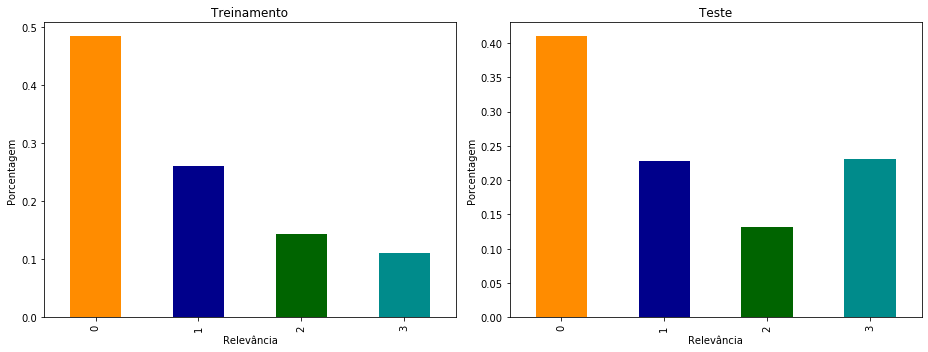

In [61]:
# Resumo Relatório 

# Resultados na Planilha Treinamento
prob_treinamento = train.B1.value_counts(True, sort=False)

P_I = prob_treinamento[0]
P_N = prob_treinamento[1]
P_R = prob_treinamento[2]
P_MTR = prob_treinamento[3]
#Agrupando as categorias relevantes em uma só
P_relevantes = P_R + P_MTR


print(f'Probabilidade de tweets irrelevantes no treinamento: {P_I*100:0.3g} %')
print(f'Probabilidade de tweets neutros no treinamento: {P_N*100:0.4g} %')
print(f'Probabilidade de tweets Relevantes e Muito Relevantes no treinamento: {P_relevantes*100:0.4g} %')


print('-'*80)

# Resultados na Planilha Teste
prob_test = test.B1.value_counts(True, sort=False)

P_I_test = prob_test[0]
P_N_test = prob_test[1]
P_R_test = prob_test[2]
P_MTR_test = prob_test[3]
P_relevantes_test = P_R_test + P_MTR_test

print(f'Probabilidade de tweets irrelevantes no teste: {P_I_test*100:0.4g} %')
print(f'Probabilidade de tweets neutros no teste: {P_N_test*100:0.4g} %')
print(f'Probabilidade de tweets Relevantes e Muito Relevantes no teste: {P_relevantes_test*100:0.4g} %')



fig = plt.figure(figsize=(13, 5))

#Plotando o grafico resumo do Treinamento
plt.subplot(121)
prob_treinamento.plot(kind='bar',color = ['darkorange', 'darkblue','darkgreen','darkcyan'])
plt.title('Treinamento')
plt.xlabel('Relevância')
plt.ylabel('Porcentagem')

#Plotando o grafico resumo do Teste
plt.subplot(122)

prob_test.plot(kind='bar', color = ['darkorange', 'darkblue','darkgreen','darkcyan'])
plt.title('Teste')
plt.xlabel('Relevância')
plt.ylabel('Porcentagem')
plt.tight_layout()
plt.show()

###  Frequencias absolutas do Treinamento

In [62]:
#calculando o total de palavras irrelevantes
irrelevantes_serie = pd.Series(clean_irrelevantes)

tabela_irrelevantes_absoluta = irrelevantes_serie.value_counts()
total_palavras_irrelevantes = irrelevantes_serie.value_counts().size
total_palavras_irrelevantes

936

In [63]:
#calculando o total de palavras neutras
neutro_serie = pd.Series(clean_neutro)

tabela_neutro_absoluta = neutro_serie.value_counts()
total_palavras_neutro = neutro_serie.value_counts().size
total_palavras_neutro

497

In [64]:
#calculando o total de palavras relevantes
relevantes_serie = pd.Series(clean_relevantes + clean_mtrelevantes) 

tabela_relevantes_absoluta = relevantes_serie.value_counts()
total_palavras_relevantes = relevantes_serie.value_counts().size
total_palavras_relevantes


1118

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### Classificador Naive-Bayes

In [65]:
lista_classifica = []

def classifica(tweet):
    
    a = 1
    b = 1
    c = 1
    
    palavras_possivel_0repeticao = total_palavras_relevantes + total_palavras_irrelevantes + total_palavras_neutro
    
    soma_tab_irrelevantes = tabela_irrelevantes_absoluta.sum()
    soma_tab_neutro = tabela_neutro_absoluta.sum()
    soma_tab_relevantes = tabela_relevantes_absoluta.sum()
    
    for palavra in tweet.split():
        
        #verifica se a palavra existe no irrelevante
        if palavra not in tabela_irrelevantes_absoluta: 
            
            a *= 1/(palavras_possivel_0repeticao + soma_tab_irrelevantes)
            
        else:
            
            a *= (tabela_irrelevantes_absoluta[palavra] + 1)/(palavras_possivel_0repeticao + soma_tab_irrelevantes)
            
            
        #verifica se a palavra existe no neutro 
        if palavra not in tabela_neutro_absoluta:
            
            b *= 1/(palavras_possivel_0repeticao + soma_tab_neutro)
            
        else:

            b *= (tabela_neutro_absoluta[palavra] + 1)/(palavras_possivel_0repeticao + soma_tab_neutro)
            
        #verifica se a palavra existe no relevante          
        if palavra not in tabela_relevantes_absoluta:
            
            c *= 1/(palavras_possivel_0repeticao + soma_tab_relevantes)
            
        else:
            c *= (tabela_relevantes_absoluta[palavra] + 1)/(palavras_possivel_0repeticao + soma_tab_relevantes)

    
    #calcula a probabilida final da palavra esta em cada categoria
    aa = a * P_I
    bb = b * P_N
    cc = c * P_relevantes
   
    #compara para ver em qual categoria pertence

    if (aa > bb and aa>cc):
        lista_classifica.append('Irrelevante')

    
    if (bb>aa and bb>cc):
        lista_classifica.append('Neutro')

    
    if (cc>aa and cc>bb):
        lista_classifica.append('Relevante')
        

#classifica os tweets da planilha teste        
for tweet in test.Teste:
    clean_tweet_split = cleanup_n(cleanup(tweet.lower()))
    classifica(clean_tweet_split)
    
test['Classificacao'] = lista_classifica
test

,Teste,B1,Classificacao
0,@moremotorcycles made by volkswagen👍,0,Neutro
1,"esperemos que seja verdade, que em portugal nã...",0,Neutro
2,"a china ""permaneceu como o maior mercado único...",3,Neutro
3,volkswagen investirá em 6 fábricas de baterias...,1,Neutro
4,"inclusive, é bem provável que os agressores gr...",2,Irrelevante
...,...,...,...
315,@portaltracklist @ford @volkswagen_ podem faze...,3,Irrelevante
316,bem feito fiat! aqui é volkswagen,3,Relevante
317,@vitorsaraivas n da p eu ter um golzinho pq a ...,3,Relevante
318,2018 volkswagen vento\nhttps://t.co/rjf0i6nznx...,0,Neutro


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [66]:
verdadeiro_irrelevante = 0
falso_irrelevante = 0

verdadeiro_neutro = 0
falso_neutro = 0

verdadeiro_relevante = 0
falso_relevante = 0

veredito = []

for ii in range(len(test)):
    
    #compara se o tweet permaneceu irrelevante
    if test['B1'][ii] == 0:
        
        if test['Classificacao'][ii] == 'Irrelevante' :
            veredito.append('Verdadeiro Irrelevante')
            verdadeiro_irrelevante += 1
                            
        else :
            veredito.append('Falso Irrelevante')
            falso_irrelevante += 1

    #compara se o tweet permaneceu neutro        
    if test['B1'][ii] == 1:
        
        if test['Classificacao'][ii] == 'Neutro' :
            veredito.append('Verdadeiro Neutro')
            verdadeiro_neutro += 1
            
        else:
            veredito.append('Falso Neutro')
            falso_neutro += 1
      
    #compara se o tweet permaneceu relevante
    if test['B1'][ii] == 2 or test['B1'][ii]==3:
        
        if test['Classificacao'][ii] == 'Relevante':
            veredito.append('Verdadeiro Relevante')
            verdadeiro_relevante += 1
            
        else:
            veredito.append('Falso Relevante')
            falso_relevante += 1
            
test['Veredito'] = veredito
test.Veredito = pd.Categorical(test.Veredito, categories = ('Verdadeiro Irrelevante','Falso Irrelevante','Verdadeiro Neutro','Falso Neutro','Verdadeiro Relevante','Falso Relevante'),ordered=False)

#calcula as frequencias relativas de cada veredito
prob_veredito = test.Veredito.value_counts(True, sort=False)

print (f'Verdadeiros irrelevantes: {(((prob_veredito[0])*100).round(2))} %')
print (f'Falsos irrelevantes: {(((prob_veredito[1])*100).round(2))} %')

print('-'*80)

print (f'Verdadeiros neutros: {(((prob_veredito[2])*100).round(2))} %')
print (f'Falsos neutros: {(((prob_veredito[3])*100).round(2))} %')

print('-'*80)

print (f'Verdadeiros relevantes: {(((prob_veredito[4])*100).round(2))} %')
print (f'Falsos relevantes: {(((prob_veredito[5])*100).round(2))} %')

#acuracia =  soma das probabilidades dos vereditos verdadeiros
acuracia = (((prob_veredito[0])*100).round(2)) + (((prob_veredito[2])*100).round(2)) + (((prob_veredito[4])*100).round(2))

print('_'*80)

print('\033[1m' + 'Acurácia do classificador: ' + '\033[92m', acuracia, '%' )


Verdadeiros irrelevantes: 24.06 %
Falsos irrelevantes: 16.88 %
--------------------------------------------------------------------------------
Verdadeiros neutros: 10.0 %
Falsos neutros: 12.81 %
--------------------------------------------------------------------------------
Verdadeiros relevantes: 14.69 %
Falsos relevantes: 21.56 %
________________________________________________________________________________
Acurácia do classificador:  48.75 %


In [67]:
#constroi uma tabela comparativa entre nossa cassificacao e a do classificador
pd.crosstab(test.B1, test.Classificacao, normalize=True, margins=True)

Classificacao,Irrelevante,Neutro,Relevante,All
B1,,,,
0,0.240625,0.103125,0.065625,0.409375
1,0.075000,0.100000,0.053125,0.228125
2,0.040625,0.065625,0.025000,0.131250
3,0.062500,0.046875,0.121875,0.231250
All,0.418750,0.315625,0.265625,1.000000


___
### Concluindo

É possível concluir que o classficador não obteve uma eficácia muito alta, porém era de se esperar que ocorreriam vereditos de falsas afirmações pois a base de tweets que levam o nome da marca Volkswagen são, em grande maioria, indiferentes à demonstração de opinião sobre a qualidade da marca ou dos serviços prestados pela mesma. Ao analisar a performance do classificador, os numeros probabilisticos de veredito correto se manteve apenas um pouco maior que veredito errado, ou seja, tweets de mesma categoria foram confundidos pelo classificador, porém o resultado de veredito verdadeiro foi maior.


### Tweets que apresentam dupla negação ou sarcasmo

Como o fator determinante de relevância escolhido pelo grupo foi em relação na demonstração de crítica sobre a marca, tweets que apresentarem quaisquer contradição **não afetará o desempenho do nosso classificador**, uma vez que estarão expondo uma opinião e assim, classificados como relevantes.

### Plano de expansão

O motivo pelo qual o financiamento do projeto deve ser expandido é que, com mais tempo e recursos, será possível obter uma base de treinamento maior que possibilite a função do classificador ter mais exemplos de relevantes, neutros e irrelevantes. Além disso, com mais tempo e pesquisa, outras funções de limpeza poderiam ser ativadas no processo de montagem do próprio classificador. Ou seja, dado a continuação do investimento, a acurácia do classificador subiria sendo cada vez mais benéfico para a empresa. 

###  O porquê de não poder alimentar minha base de Treinamento automaticamente usando o próprio classificador aplicado a novos tweets

É possível observar que o desempenho do classificador não mantém a relevância que classificamos manualmente, em outras palavras, parte da "real" relevância se perde com a classificação feita pelo classificador. Sendo assim, se alimentarmos a base de Treinamento com tweets classificados pelo classificador, a relevância fica menos precisa, uma vez que os erros de falsos relevantes, falsos neutros e falsos irrelevantes irão se propagar resultando em uma base de teste cada vez mais evasiva gerando resultados menos conclusivos.

### Diferentes cenários de uso para o classificador Naive-Bayes

**1.** Usar o classificador para separar as **fake news** das notícias verídicas. Na maioria das vezes esse cenário é visto em campanhas políticas, onde a circulação de informação é um fator crucial nesse âmbito. A determinação seria em base do conteúdo demasiado apelativo que acompanham as frases das notícias falsas, onde o classificador agiria de acordo com esses padrões e retornaria a probabilidade da noticia em questão ser verdadeira ou falsa, sendo capaz de contribuir para veiculação de informação verdadeira à população.

     
**2.** O Naive-Bayes pode ser usado na classificação de **emails** ou ainda aplicativos de mensagem, operando em cima da caixa de entrada para classificar a mensagem como relavante ou spam. Nesse caso, o classificador poderia utilizar o design de um spam e assim ser capaz de indentificar e diferencia-lo de uma mensagem relevante de modo a melhorar qualquer serviço de recebimento de email/mensagens (Gmail, Outlook, Whatsaap, ...).


**3.** Muito discutido nos dias de hoje, as **redes socias** e as **plataformas de streaming**, cujo algoritmo também podia ser alvo de um classificador Naive-Bayes, de modo que o classificador operasse com base na ações passadas do usuário para criar uma experiencia mais pessoal e indicar, com base nas escolhas de mesmos tipos de usuários, sugestões que levam grande chance de serem úteis ao usuário.




### Melhorias que poderiam ser feitas ao classificador

1.**Aumento da base de dados**. Nesse projeto, foi utilizado 750 tweets (treinamento e teste), e caso fosse maior, após a classificação manual, sem dúvidas a precisão do classiicador seria mais precisa. Para isso basta usar o código que captura os tweets da marca e aumentar o número tanto para treinamento quanto para o teste, proporcionalmente. Em seguida, classifica-los manualmente usando as categorias e o mesmo padrão de relevância definido e explicado no começo do projeto.

2.**Limpeza de palavras** que sozinhas, não possuem quaiquer importância para determinar se o tweet é relevante, neutro ou irrelevante. São elas palavras de ligação: artigos e algumas preposições. Desse modo, o classificador obteria uma maior acertividade quanto à palavra/frase é ou não de fato relevante. Para isso, criar uma função de limpeza que recompila em espaço a lista de exemplos dessas palavras: ' o, a, os, as, ante, após, com, em, perante, por, sem, sob'.

3.De grande interesse da empresa, poderia ocorrer a **separação dos relevantes**, tweets que revelam uma crítica positiva dos tweets que levam uma crítica negativa. Desse modo, a equipe de marketing da empresa teria fácil acesso ao que realmente funciona/qualidades da volkswagen e ao que não funciona/defeitos. Para realizar essa separação, somente a base da dados marcados como relevantes seria usada, e nela, aplicada uma outra classificação quanto sua categoria de relevância, mudando posteriormente o código do classificador o qual passaria ser uma classe e seria dado duas funções: o primeiro classificador de todos os tweets, e um segundo classificador apenas de tweets relevantes.




## Etapa 6 
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

In [68]:
from sklearn.model_selection import train_test_split

filename_etapa6 = 'Etapa6_df.xlsx'
df = pd.read_excel(filename_etapa6)

train6, test6 = train_test_split(df, test_size=0.4)
test6.head()

,Tweet,B1
274,fábrica de palmela não deverá ser afetada pela...,2
733,"#volkswagen id.4, um suv do porte do taos, ser...",0
421,volkswagen polo sportline 1.6 flex 2012❤😅👍🏻\n⠀...,3
98,vocês querem me ouvir falar volkswagen é falha...,0
505,"@zeiderp @volkswagen agradecemos o carinho, ze...",3


___
## Referências

Teoria Naive-Bayes
- [Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  

- [A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) 

- [Aula08_Atividade_Texto_Camoes_Machado_MLcomNB.ipynb](https://github.com/Insper/CD21-1/blob/main/aula08/Aula08_Atividade_Texto_Camoes_Machado_MLcomNB.ipynb)

Emoji Cleanup
- https://stackoverflow.com/questions/49921720/how-to-split-emoji-from-each-other-python

Biblioteca para fazer o split do Train/Test
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis **FEITO**
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis **FEITO**
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B) **FEITO**
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento **FEITO**
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto **FEITO**
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa) **FEITO**
* Etapa 6 
